In [2]:
#Importar librerias

import sqlite3
import pandas as pd

In [7]:
#Establecer la conexión

conn = sqlite3.connect('/content/festivos_colombia.db')

#Festivos
#SELECT ¨* FROM -> Señalar toda la tabla
festivos = pd.read_sql('SELECT * FROM holidays', conn)
festivos


,index,date,localName,name,countryCode,fixed
0,0,2019-01-01,Año Nuevo,New Year's Day,CO,TRUE
1,1,2019-01-06,Día de los Reyes Magos,Epiphany,CO,TRUE
2,2,2019-03-19,Día de San José,Saint Joseph's Day,CO,TRUE
3,3,2019-05-01,Primero de Mayo,Labour Day,CO,TRUE
4,4,2019-06-29,San Pedro y San Pablo,Saint Peter and Saint Paul,CO,TRUE
5,5,2019-07-20,Declaracion de la Independencia de Colombia,Declaration of Independence,CO,TRUE
6,6,2019-08-07,Battle of Boyacá,Battle of Boyacá,CO,TRUE
7,7,2019-08-15,La Asunción,Assumption of Mary,CO,TRUE
8,8,2019-10-12,Día de la Raza,Columbus Day,CO,TRUE
9,9,2019-11-01,Dia de los Santos,All Saints’ Day,CO,TRUE


In [8]:
#Query estructurado

query = """SELECT date, LocalName, countryCode
        FROM holidays LIMIT 20 """


#Filtrar por fecha
holidays = pd.read_sql(query, conn, parse_dates = "date")
holidays


,date,localName,countryCode
0,2019-01-01,Año Nuevo,CO
1,2019-01-06,Día de los Reyes Magos,CO
2,2019-03-19,Día de San José,CO
3,2019-05-01,Primero de Mayo,CO
4,2019-06-29,San Pedro y San Pablo,CO
5,2019-07-20,Declaracion de la Independencia de Colombia,CO
6,2019-08-07,Battle of Boyacá,CO
7,2019-08-15,La Asunción,CO
8,2019-10-12,Día de la Raza,CO
9,2019-11-01,Dia de los Santos,CO


In [10]:
#Generar la base de datos desde un csv
#Leer el archivo

carreras = pd.read_csv('/content/Corredores.csv')
carreras

,Pais,Corredor,Lugar,Genero,Edad,Tiempo
0,GBR,3475,3592,Male,52,217.483333
1,NY,13594,13853,Female,40,272.550000
2,FRA,12012,12256,Male,31,265.283333
3,MI,10236,10457,Female,33,256.150000
4,NY,9476,9686,Male,33,252.250000
...,...,...,...,...,...,...
995,FRA,15972,16261,Male,61,285.883333
996,GBR,1090,1131,Male,37,191.916667
997,IRL,16419,16713,Female,53,289.016667
998,NY,13977,14241,Female,21,276.050000


In [16]:
#Conectar con la base de datos
#Sino la encuentra creará una base de datos vacía

conexion = sqlite3.connect('carrera.db')

cursor = conexion.cursor()

In [14]:
#Guardar el DataFrame (DF) en una tabla de la base de datos
carreras.to_sql('carrera', conexion, if_exists = 'replace', index= False)

#Verificar los datos que se hayan guardado correctamente
#Seleccionar todos los datos de la base de datos
query = 'SELECT * FROM carrera'
#Usar la conexión en un dataFrame
df = pd.read_sql(query, conexion)

#Mostrar los datos
print(df)

#Cerrar la conexion
conexion.close()

    Pais  Corredor  Lugar  Genero  Edad      Tiempo
0    GBR      3475   3592    Male    52  217.483333
1     NY     13594  13853  Female    40  272.550000
2    FRA     12012  12256    Male    31  265.283333
3     MI     10236  10457  Female    33  256.150000
4     NY      9476   9686    Male    33  252.250000
..   ...       ...    ...     ...   ...         ...
995  FRA     15972  16261    Male    61  285.883333
996  GBR      1090   1131    Male    37  191.916667
997  IRL     16419  16713  Female    53  289.016667
998   NY     13977  14241  Female    21  276.050000
999  GER      8527   8726    Male    55  240.966667

[1000 rows x 6 columns]


In [18]:
query = '''CREATE TABLE carreras (
    ID INTEGER PRIMARY KEY,
    Nombre TEXT NOT NULL,
    Edad INTEGER,
    Nacionalidad TEXT,
    Tiempo REAL
);
'''

cursor.execute(query)




In [19]:
#Ver la estructura de la tabla
cursor.execute("PRAGMA table_info(carreras)")
estructura = cursor.fetchall()
for col in estructura:
    print(col)


(0, 'ID', 'INTEGER', 0, None, 1)
(1, 'Nombre', 'TEXT', 1, None, 0)
(2, 'Edad', 'INTEGER', 0, None, 0)
(3, 'Nacionalidad', 'TEXT', 0, None, 0)
(4, 'Tiempo', 'REAL', 0, None, 0)


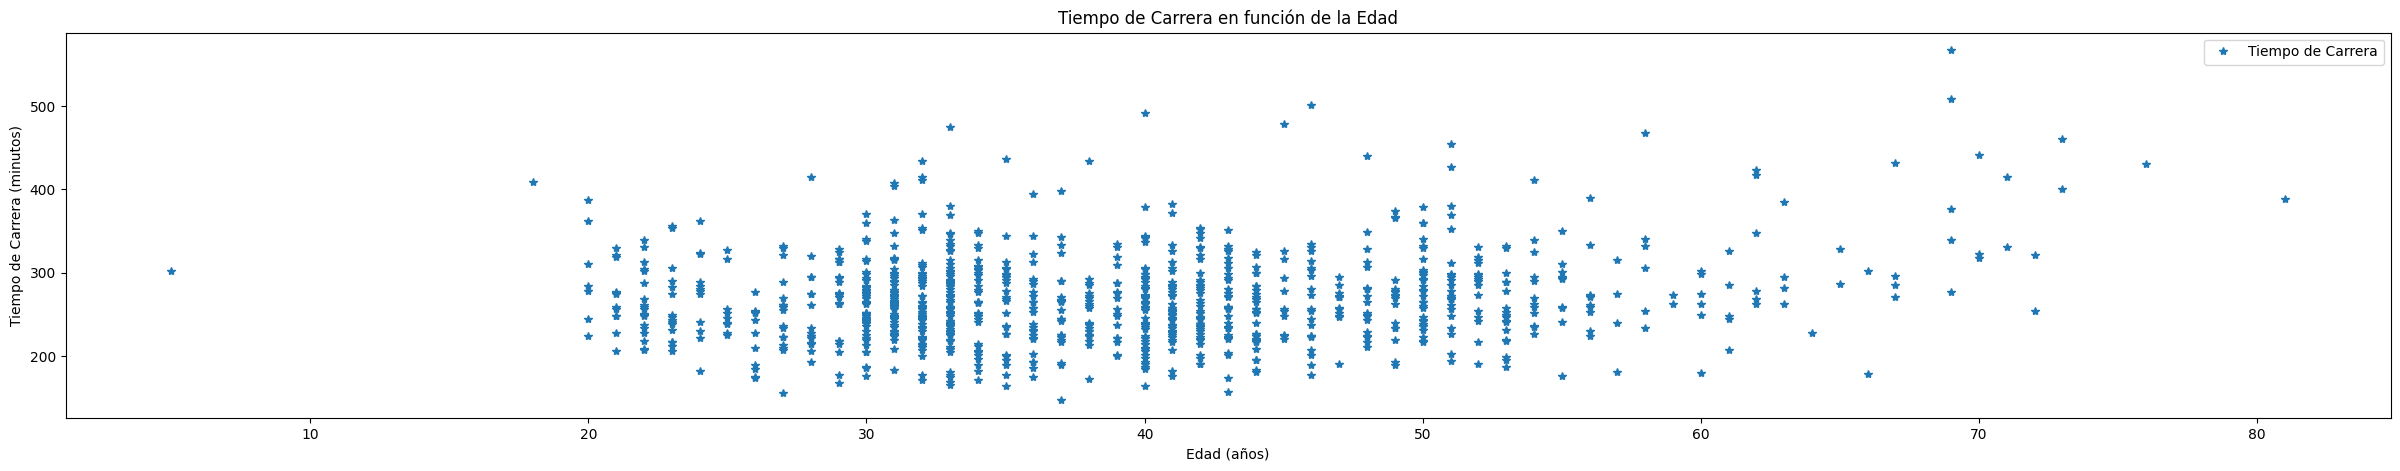

In [22]:
#Generar una gráfica a partir de la tabla
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(30, 5))

# Graficar la Edad (eje x) vs Tiempo (eje y)
plt.plot(df['Edad'], df['Tiempo'], '*')

# Agregar leyenda
plt.legend(['Tiempo de Carrera'])

# Agregar título y etiquetas a los ejes
plt.title('Tiempo de Carrera en función de la Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Tiempo de Carrera (minutos)')

# Mostrar el gráfico
plt.show()
